In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pylab as pl
from sklearn.ensemble import IsolationForest
from math import * # module math
import matplotlib.pyplot as plt # visualization
from PIL import Image
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from kmodes.kmodes import KModes
from mlxtend.preprocessing import minmax_scaling
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv
/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv
/kaggle/input/datasets-for-churn-telecom/cell2celltrain.csv
/kaggle/input/datasets-for-churn-telecom/cell2cellholdout.csv
/kaggle/input/clients-offers/Clients offers.csv
/kaggle/input/telecom-customer/Telecom_customer churn.csv
/kaggle/input/wa-fn-usec-telco-customer-churn-new-ad/WA_Fn-UseC_-Telco-Customer-Churn_new_ad.csv


***Objectives:***


**Data Cleaning & Transformation:** Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

**Feature Engineering:** Determine the features to create a customer-centric dataset, setting the foundation for customer segmentation.

**Data Preprocessing:** Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.

**Customer Segmentation using K-Means Clustering:** Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.

**Cluster Analysis & Evaluation:** Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.

**Recommendation System:** Implement a system to recommend best offers to customers within the same cluster to retain existing customers and build customer loyalty.

# **1-Loading dataset**

In [2]:
#show all the columns
pd.set_option('display.max_columns', None)


In [3]:
df1= pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv')
df1.head(15)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [4]:
df2= pd.read_csv('/kaggle/input/telecom-customer/Telecom_customer churn.csv')
df2.head(5)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


In [5]:
df3= pd.read_csv('/kaggle/input/wa-fn-usec-telco-customer-churn-new-ad/WA_Fn-UseC_-Telco-Customer-Churn_new_ad.csv')
df3.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df4= pd.read_csv('/kaggle/input/datasets-for-churn-telecom/cell2celltrain.csv')
df4.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# **2-Initial data analysis**

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [9]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10323 entries, 0 to 10322
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10323 non-null  object 
 1   gender            10323 non-null  object 
 2   SeniorCitizen     10323 non-null  int64  
 3   Partner           10323 non-null  object 
 4   Dependents        10323 non-null  object 
 5   tenure            10323 non-null  int64  
 6   PhoneService      10323 non-null  object 
 7   MultipleLines     10323 non-null  object 
 8   InternetService   10323 non-null  object 
 9   OnlineSecurity    10323 non-null  object 
 10  OnlineBackup      10323 non-null  object 
 11  DeviceProtection  10323 non-null  object 
 12  TechSupport       10323 non-null  object 
 13  StreamingTV       10323 non-null  object 
 14  StreamingMovies   10323 non-null  object 
 15  Contract          10323 non-null  object 
 16  PaperlessBilling  10323 non-null  object

In [10]:
df3.describe().T


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,10323.0,0.203139,0.402354,0.00,0.00,0.00,0.0,1.00
tenure,10323.0,32.284317,24.574950,0.00,9.00,29.00,55.0,72.00
MonthlyCharges,10323.0,64.818493,30.113270,18.25,35.45,70.45,89.9,118.75


In [11]:
df3.describe(include='object').T

,count,unique,top,freq
customerID,10323,10310,7471-MQPOS,2
gender,10323,2,Male,5245
Partner,10323,2,No,5365
Dependents,10323,2,No,6622
PhoneService,10323,2,Yes,9338
MultipleLines,10323,3,No,4977
InternetService,10323,3,Fiber optic,4551
OnlineSecurity,10323,3,No,5121
OnlineBackup,10323,3,No,4519
DeviceProtection,10323,3,No,4517


**Inferences**
* There are some missing values that should be treated 

In [12]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

# **3-Data cleaning & transformation**

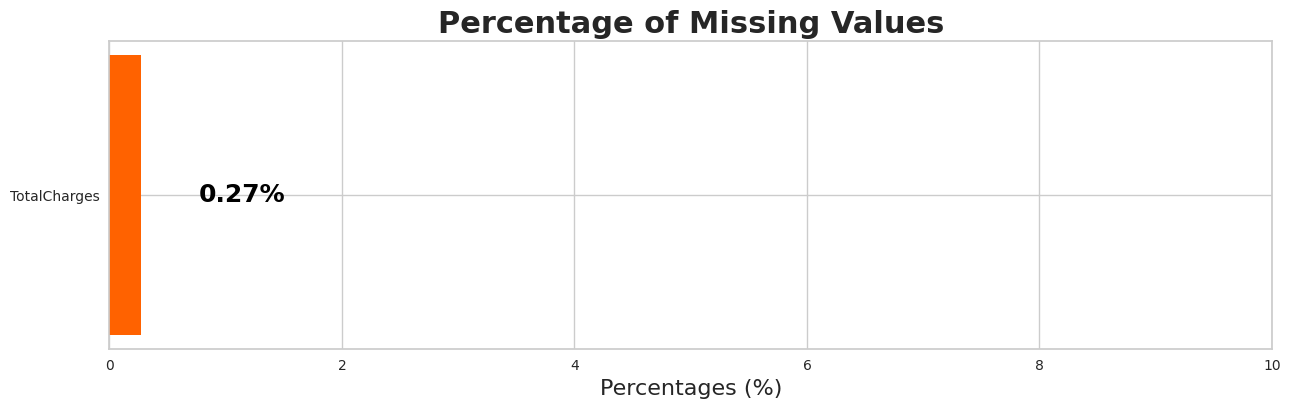

In [13]:
# Calculating the percentage of missing values for each column
missing_data = df3.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df3.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 10])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()


**interpretation:**
* The TotalCharges column has a small percentage of data missing. This issue could affect the data quality so removing the rows with missing values would be a good strategy to build clean and reliable dataset

In [14]:
print(type(missing_percentage))
print(type(missing_data))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
#Extracting rows with missing values of 'TotalCharges' columns
df3[df3['TotalCharges'].isnull()].head(28)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
997,1374-DMZUI,Female,1,No,No,4,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.30,NaN,Yes
1006,9524-EGPJC,Female,0,No,No,18,Yes,Yes,Fiber optic,No,No,No,Yes,No,Yes,Month-to-month,Yes,Electronic check,90.10,NaN,Yes
1007,6993-OHLXR,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,NaN,Yes
1008,8818-XYFCQ,Male,0,Yes,Yes,32,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.55,NaN,Yes
1009,6419-ZTTLE,Male,1,Yes,No,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Electronic check,20.75,NaN,No
2113,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,NaN,No
2114,7707-PYBBH,Male,0,No,No,40,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Mailed check,61.90,NaN,No
2161,5159-YFPKQ,Female,0,No,No,2,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,75.80,NaN,Yes
2182,2530-FMFXO,Male,0,Yes,Yes,56,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,103.20,NaN,No
2183,6844-DZKRF,Male,0,No,No,2,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),50.20,NaN,No


In [16]:
df3 = df3.dropna(subset=['TotalCharges'])


In [17]:
#Verifiyin the removal of missing values
df3.isnull().sum().sum()

0

In [18]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df3[df3.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['customerID'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
10312,3149-NPXCN,Male,1,No,No,45,Yes,Yes,Fiber optic,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.80,1600.95,No
10320,3149-NPXCN,Male,1,No,No,45,Yes,Yes,Fiber optic,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),24.80,1600.95,No
10311,3948-BLXYF,Female,0,No,Yes,66,Yes,No,No,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,74.80,1821.2,No
10319,3948-BLXYF,Female,0,No,Yes,66,Yes,No,No,Yes,No,No,No,Yes,Yes,One year,No,Mailed check,74.80,1821.2,No
10314,4641-NJXUX,Male,1,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,1218.55,Yes
10322,4641-NJXUX,Male,1,No,No,15,Yes,No,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.35,1218.55,Yes
10313,5140-PTXKA,Male,0,No,Yes,69,Yes,No phone service,No,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,100.85,399.25,No
10321,5140-PTXKA,Male,0,No,Yes,69,Yes,No phone service,No,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,100.85,399.25,No


**In our context, the existance of exactly same rows is useless. For that, we need to remove duplicates**

In [19]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df3.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df3.drop_duplicates(inplace=True)

The dataset contains 4 duplicate rows that need to be removed.


In [20]:
df3.shape[0]

10291

# **4-Finding zero units**

In [21]:
df3[df3['MonthlyCharges']==0].describe()

,SeniorCitizen,tenure,MonthlyCharges
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [22]:
# Resetting the index of the cleaned dataset
df3.reset_index(drop=True, inplace=True)

In [23]:
df3.shape[0]

10291

# **5-Outliers detection and treatment**

In this section, we will identify and handle outliers in our dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

We are going to use the **Isolation Forest** algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

Let's proceed with this approach:



In [24]:
customer_data = df3
customer_data['customerID'] = customer_data['customerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [25]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        10291 non-null  string 
 1   gender            10291 non-null  string 
 2   SeniorCitizen     10291 non-null  Int64  
 3   Partner           10291 non-null  string 
 4   Dependents        10291 non-null  string 
 5   tenure            10291 non-null  Int64  
 6   PhoneService      10291 non-null  string 
 7   MultipleLines     10291 non-null  string 
 8   InternetService   10291 non-null  string 
 9   OnlineSecurity    10291 non-null  string 
 10  OnlineBackup      10291 non-null  string 
 11  DeviceProtection  10291 non-null  string 
 12  TechSupport       10291 non-null  string 
 13  StreamingTV       10291 non-null  string 
 14  StreamingMovies   10291 non-null  string 
 15  Contract          10291 non-null  string 
 16  PaperlessBilling  10291 non-null  string

In [26]:
customer_data['Churn'].unique()

<StringArray>
['No', 'Yes']
Length: 2, dtype: string

In [27]:
#customer_data[customer_data['gender']]

In [28]:
customer_data.describe().T
print(type(customer_data))


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,10291.0,0.202993,0.402247,0.0,0.0,0.0,0.0,1.0
tenure,10291.0,32.292586,24.576542,0.0,9.0,29.0,55.0,72.0
MonthlyCharges,10291.0,64.772787,30.116918,18.25,35.4,70.4,89.9,118.75


In [123]:
print(type(customer_data))

<class 'pandas.core.frame.DataFrame'>


In [29]:
customer_data['MultipleLines'].unique()

<StringArray>
['No phone service', 'No', 'Yes']
Length: 3, dtype: string

In [30]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
#model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
#customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
#customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
#customer_data.head()

**It seems like the actual dataset doesn't align with our task. So, will perform EDA on the actual on the df1 dataframe which contain the desired features related to customer consumption patterns.**

# **6-EDA**

In [31]:
telco_train =pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-80.csv')
telco_test =pd.read_csv('/kaggle/input/telecom-churn-datasets/churn-bigml-20.csv')

In [32]:
telco_train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [33]:
telco_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [34]:
telco_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [35]:
print(telco_train["Churn"].value_counts().keys().tolist())

[False, True]


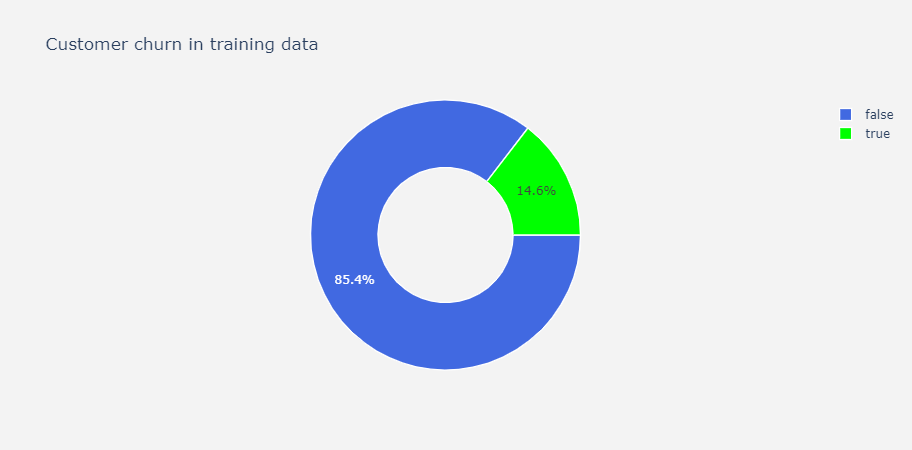

In [36]:
trace = go.Pie(labels = telco_train["Churn"].value_counts().keys().tolist(),
               values = telco_train["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

* **In this part, we will visualize the relationship between categorical features and the churn results**

<Axes: xlabel='State', ylabel='Churn'>

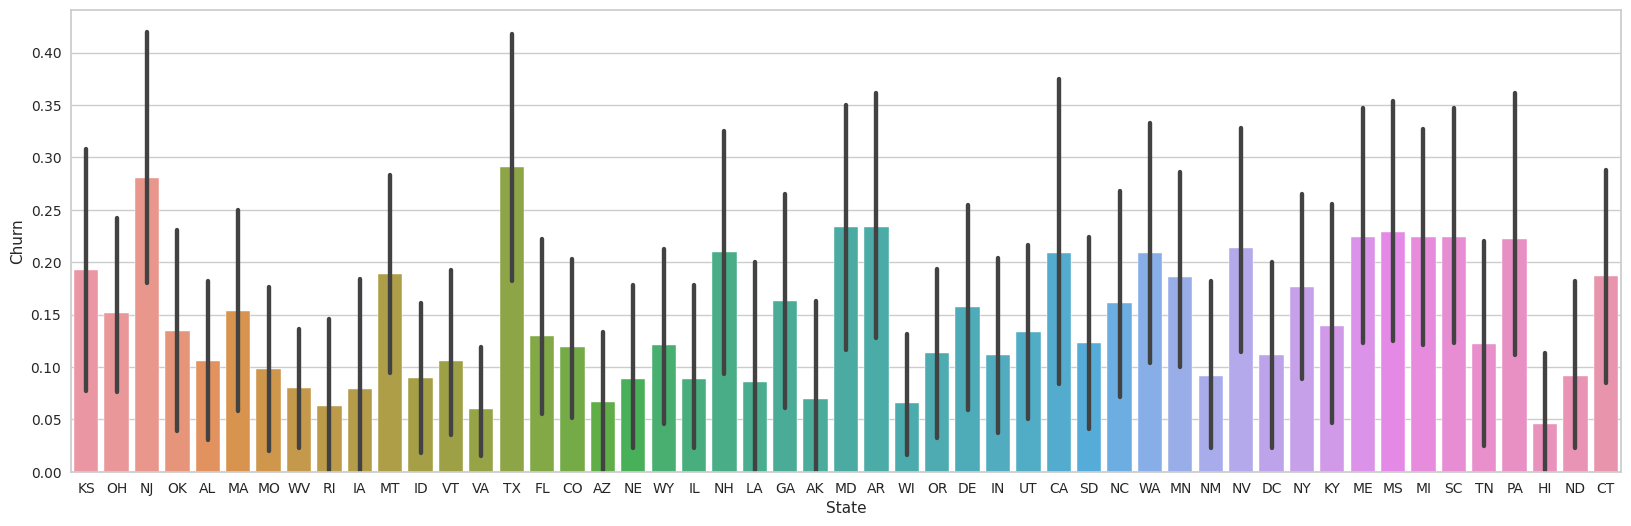

In [37]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn',data= telco_train)

<Axes: xlabel='Account length', ylabel='Churn'>

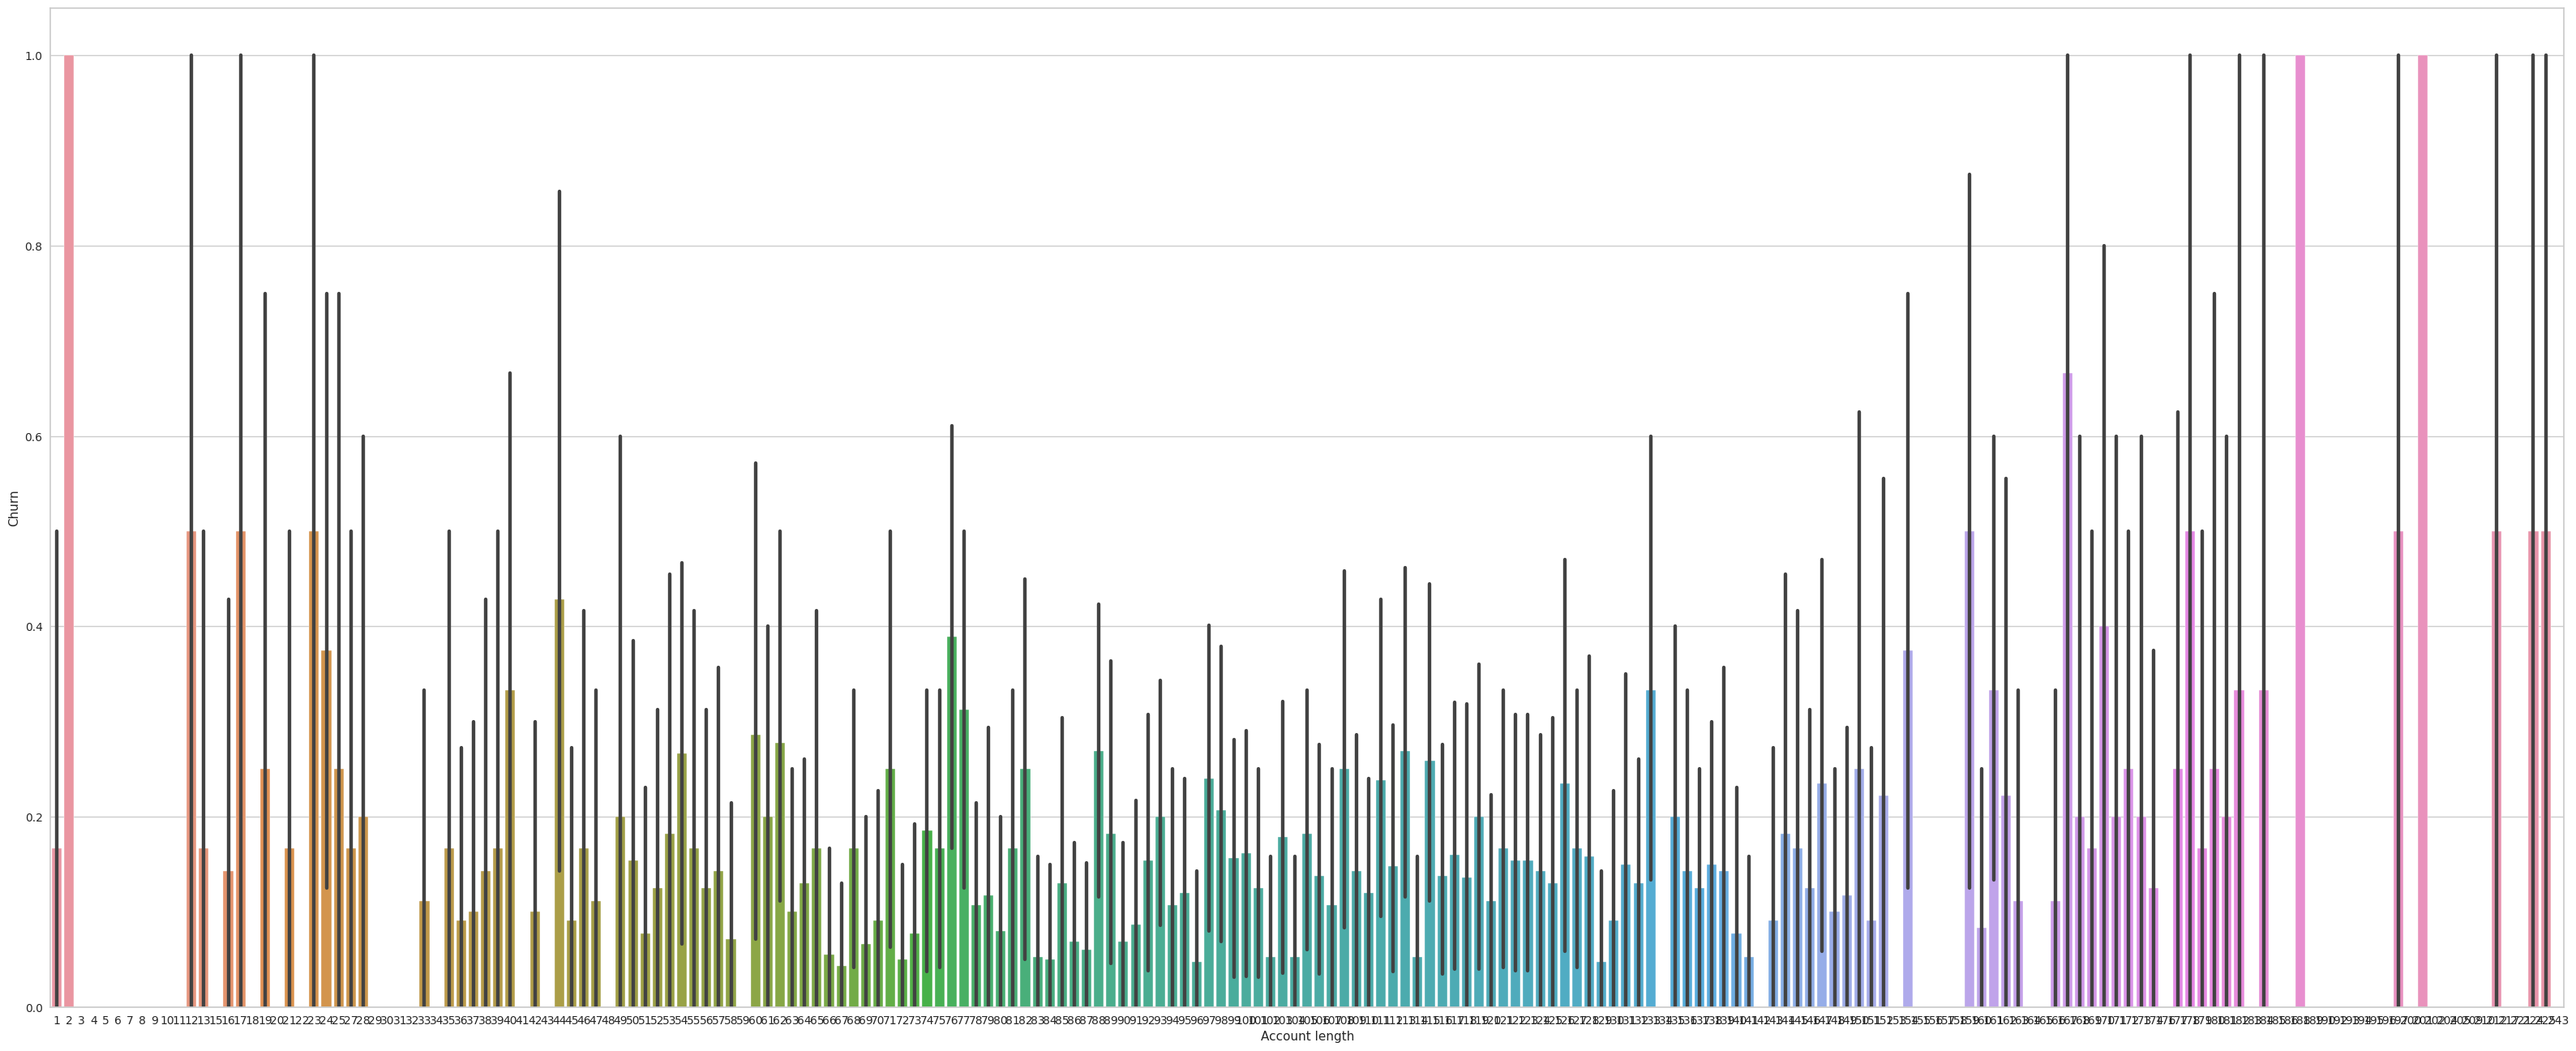

In [38]:
#The account length parameter is the number of days that this account has been active
plt.figure(figsize=(40,16))
sns.barplot(x='Account length', y='Churn', data= telco_train)

<Axes: xlabel='Churn', ylabel='Account length'>

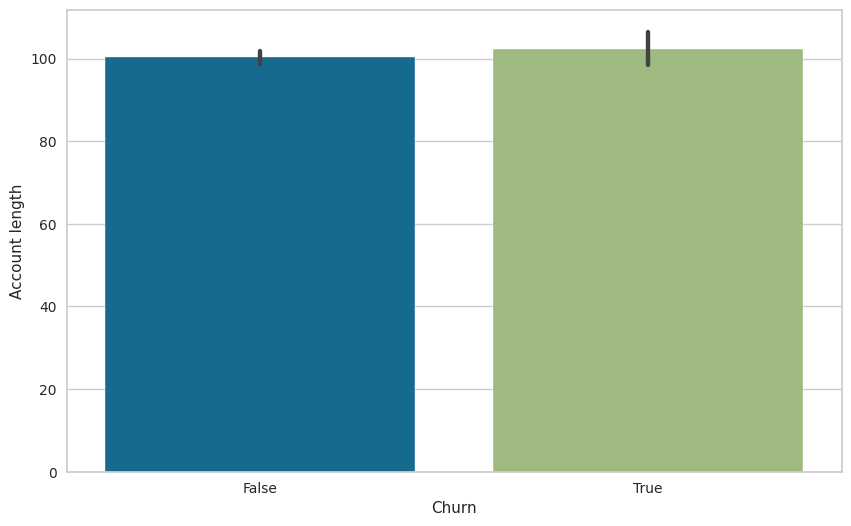

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(y='Account length', x='Churn', data= telco_train)

<Axes: xlabel='Customer service calls', ylabel='Churn'>

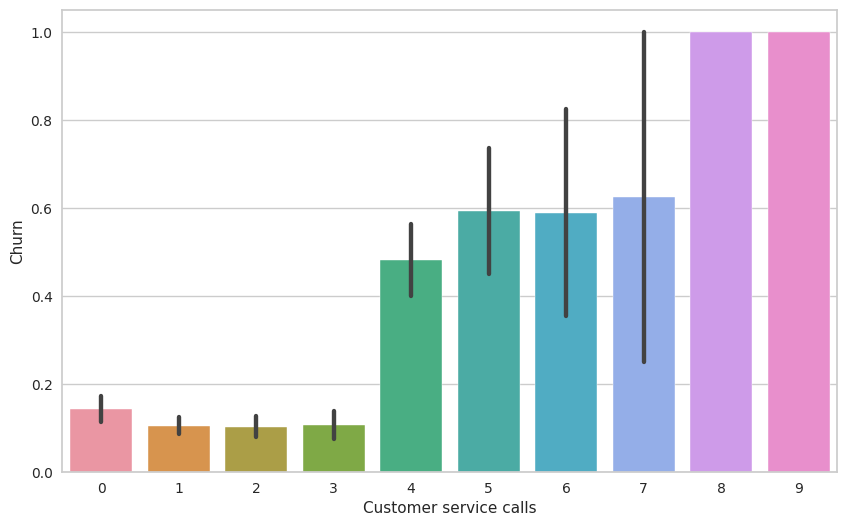

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='Customer service calls', y='Churn', data= telco_train)

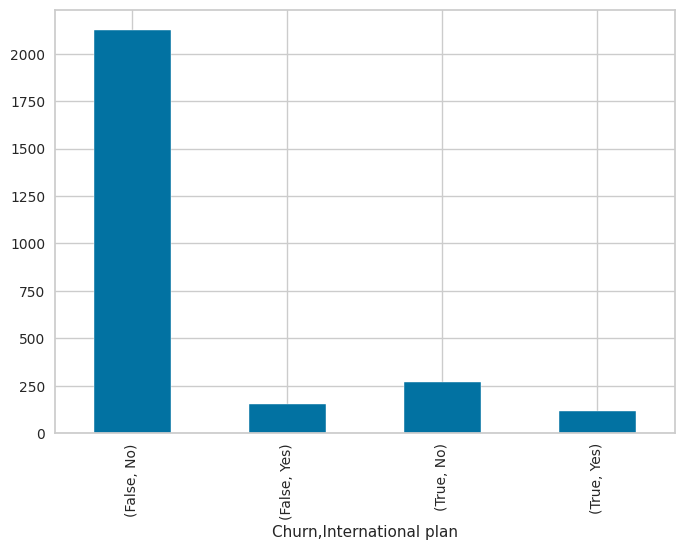

In [41]:
churn_intl = telco_train.groupby(['Churn','International plan']).size()
churn_intl.plot(kind='bar',stacked=True)
plt.show()

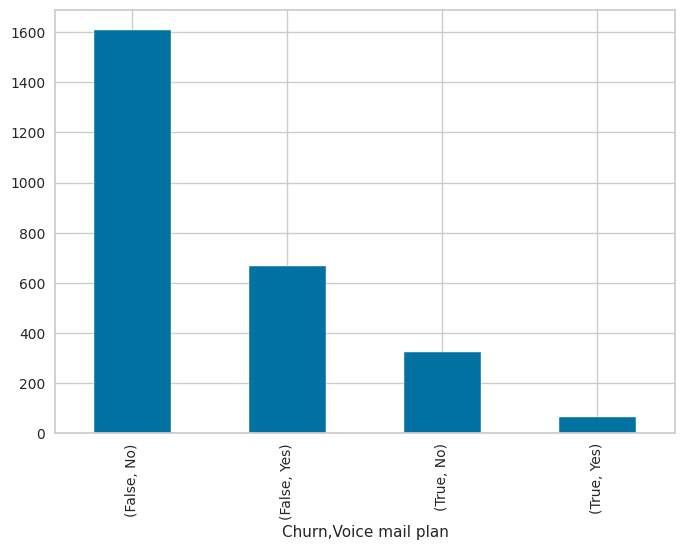

In [42]:
churn_intl = telco_train.groupby(['Churn','Voice mail plan']).size()
churn_intl.plot(kind='bar',stacked=True)
plt.show()

<Axes: xlabel='Number vmail messages', ylabel='Churn'>

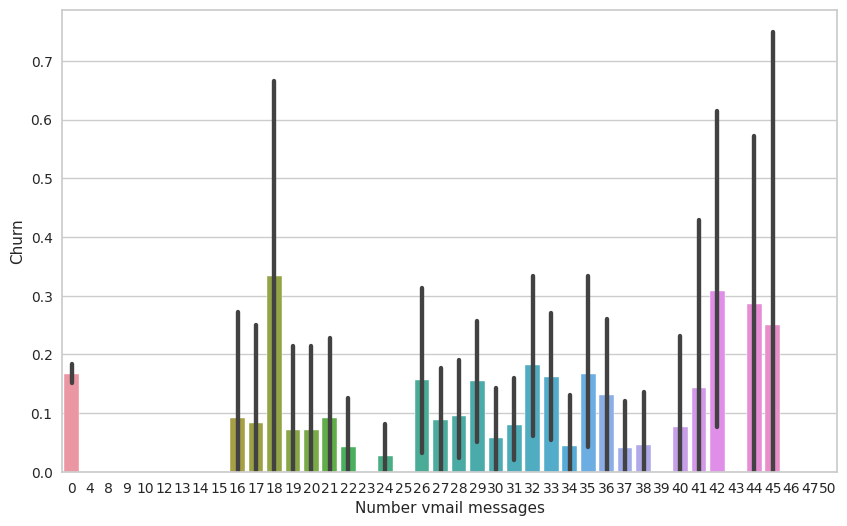

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='Number vmail messages', y='Churn', data= telco_train)

In [44]:
#Create a new column that represents the total charge of each client
telco_train['Total charge'] = telco_train['Total day charge'] + telco_train['Total eve charge'] + telco_train['Total night charge'] + telco_train['Total intl charge']
telco_test['Total charge'] = telco_test['Total day charge'] + telco_test['Total eve charge'] + telco_test['Total night charge'] + telco_test['Total intl charge']

In [45]:


telco_train.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [46]:
telco_test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,73.32
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,54.20
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,92.29
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,41.05
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,49.60


<Axes: xlabel='Churn', ylabel='Total charge'>

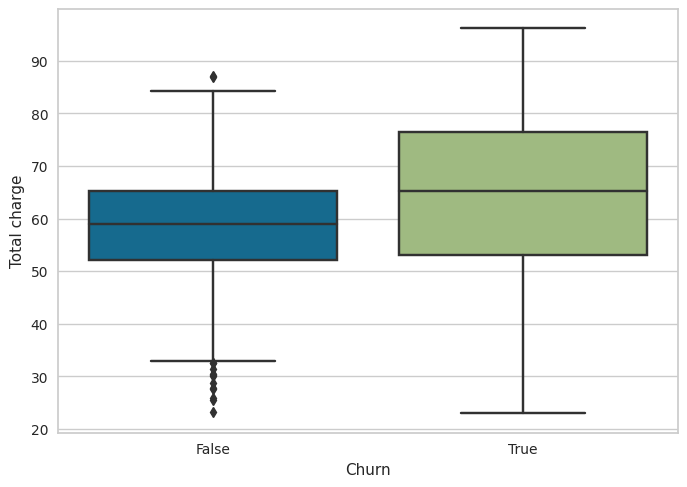

In [47]:
sns.boxplot(x='Churn', y='Total charge', data=telco_train )

* Each box chart displays the following information: the median, the lower and upper quartiles, any outliers (computed using the interquartile range), and the minimum and maximum values that are not outliers..
> In our case, total charge of churners is more important than non churners. 

**After visualizing these features, we can gain the following insights:**

* 14.6% of the total number of clients are churners.
* Texas has the biggest percentage of churners.
* The more customer service calls are, the more we have risk of churn.
* Most of the churnerns don't have international plan, neither voice message plan.
* Account length doesn't affect the risk of churn. It has a normal distribution.
* Churners have more charges to pay than non churners.




# 7-Data cleaning

**In this section, will clean our data and convert categorical features into numerical values to be able to use different ML models.**

In [48]:
telco_tr_cp=telco_train.copy()
telco_ts_cp=telco_test.copy()
telco_tr_cp.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [49]:
telco_tr_cp['Churn']= telco_tr_cp['Churn'].map({True:1,False:0})

#We don't need to replace the test copy because the churn column will be dropped later

telco_tr_cp['International plan'].replace(['No','Yes'],[0,1],inplace=True)
telco_ts_cp['International plan'].replace(['No','Yes'],[0,1],inplace=True)
from sklearn.preprocessing import LabelEncoder

#Now we use the label encoder method
le= LabelEncoder()
telco_tr_cp['Voice mail plan']=le.fit_transform(telco_tr_cp['Voice mail plan'])
telco_ts_cp['Voice mail plan']=le.fit_transform(telco_ts_cp['Voice mail plan'])
telco_tr_cp['State']=le.fit_transform(telco_tr_cp['State'])
telco_ts_cp['State']=le.fit_transform(telco_ts_cp['State'])


In [50]:
telco_tr_cp.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


In [51]:
telco_ts_cp.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,18,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False,73.32
1,15,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True,54.20
2,34,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True,92.29
3,40,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False,41.05
4,11,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False,49.60


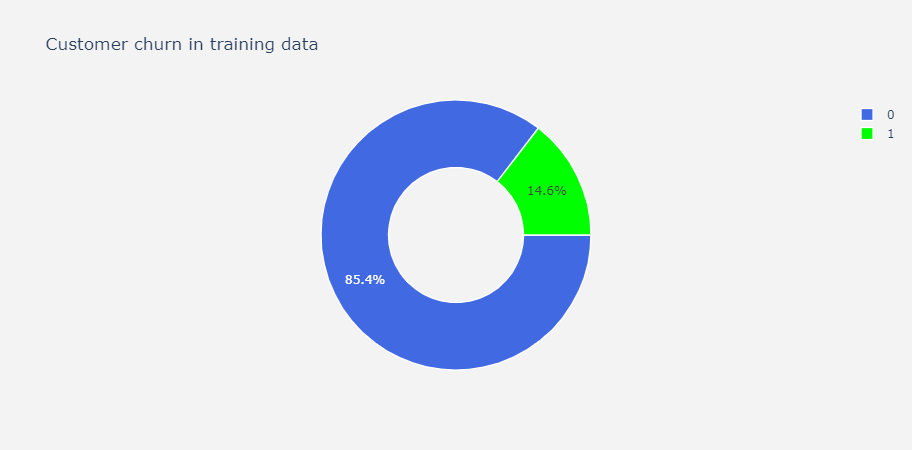

In [52]:
#Remake the donut plot to make sure the labels are correctly encoded
trace = go.Pie(labels = telco_tr_cp["Churn"].value_counts().keys().tolist(),
               values = telco_tr_cp["Churn"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue','lime'],
                             line = dict(color = "white", width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer churn in training data",
                        plot_bgcolor = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )
data = [trace]

fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# 8-Feature extraction

**In this section, we will choose features that most affect the target value and which are not redundant.**

In [53]:
telco_tr_cp.corr()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
State,1.000000,-0.007254,0.014550,-0.003144,-0.018661,-0.011960,-0.004951,0.007068,-0.004951,0.009383,-0.011494,0.009382,0.025277,0.005906,0.025269,-0.011202,0.011980,-0.011191,-0.031970,0.000430,0.004228
Account length,-0.007254,1.000000,-0.008620,0.024500,0.002448,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728,-0.005218
Area code,0.014550,-0.008620,1.000000,0.047099,0.007180,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019,-0.021753
International plan,-0.003144,0.024500,0.047099,1.000000,0.002131,0.005858,0.049550,-0.004277,0.049555,0.026616,0.010277,0.026623,-0.010310,0.018081,-0.010316,0.053162,0.011549,0.053037,-0.035955,0.277489,0.056130
Voice mail plan,-0.018661,0.002448,0.007180,0.002131,1.000000,0.957159,0.013438,-0.007541,0.013439,0.019132,0.003404,0.019147,0.001065,0.013985,0.001066,-0.013963,0.015196,-0.013931,-0.022054,-0.099291,0.018959
Number vmail messages,-0.011960,-0.002996,-0.000584,0.005858,0.957159,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474,0.021100
Total day minutes,-0.004951,0.002847,-0.023134,0.049550,0.013438,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688,0.883011
Total day calls,0.007068,0.038862,-0.009629,-0.004277,-0.007541,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290,0.008206
Total day charge,-0.004951,0.002843,-0.023130,0.049555,0.013439,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689,0.883016
Total eve minutes,0.009383,-0.015923,0.000679,0.026616,0.019132,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906,0.413272


<Axes: >

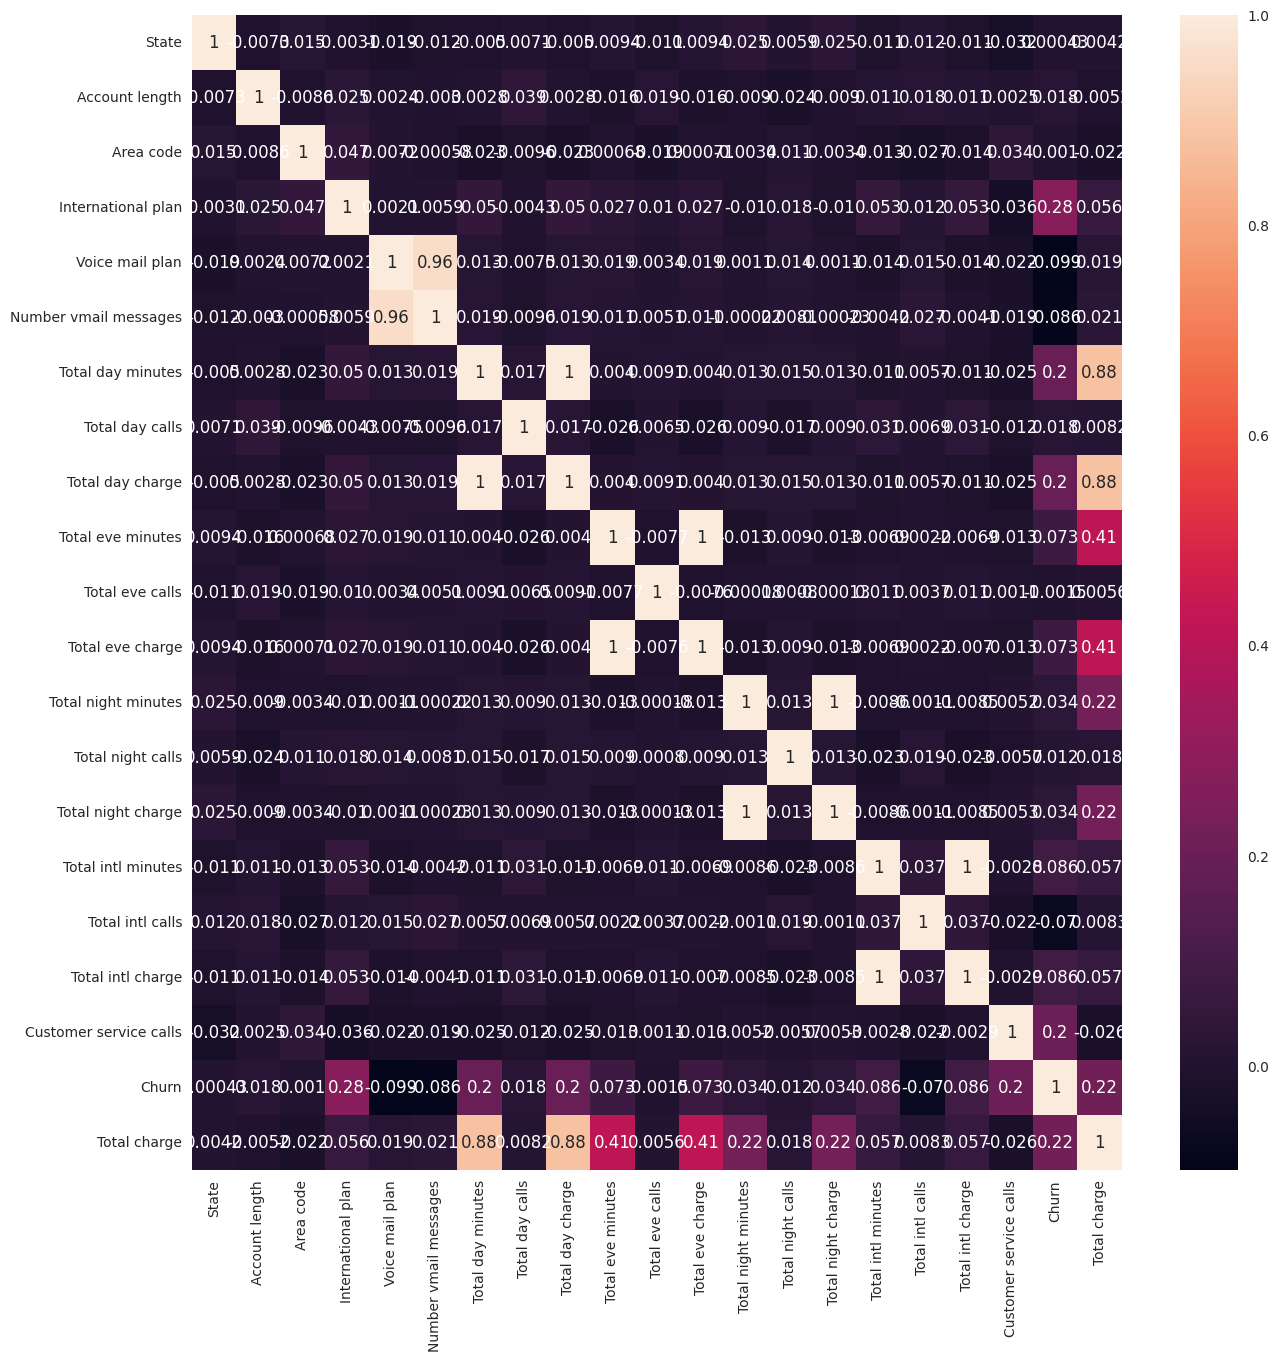

In [54]:
plt.figure(figsize=(15,15))
sns.heatmap(telco_tr_cp.corr(),annot= True)

Some features are correlated like total day charge and total day charge are correlated(coeff=1), so we will delete one them

In [55]:
telco_tr_cp1 = telco_tr_cp.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes'], axis=1)

In [56]:
features=['International plan','Total charge','Customer service calls']
X_train= telco_tr_cp1[features]
Y_train=telco_tr_cp1['Churn']

X_test= telco_ts_cp[features]
telco_ts_cp['Churn']= telco_ts_cp['Churn'].map({True:1,False:0})

Y_test=telco_ts_cp['Churn']


In [57]:
X_train.head()

,International plan,Total charge,Customer service calls
0,0,75.56,1
1,0,59.24,1
2,0,62.29,0
3,1,66.80,2
4,1,52.09,3


In [58]:

X_train=minmax_scaling(X_train, columns=features)
X_test=minmax_scaling(X_test, columns=features)


In [59]:
X_test.head()

,International plan,Total charge,Customer service calls
0,0.0,0.709094,0.125
1,0.0,0.415887,0.500
2,0.0,1.000000,0.500
3,0.0,0.214231,0.250
4,0.0,0.345346,0.125


* **Now our dataset is ready and we will move to build the model**

# 9-Build the model for churn prediction

**Import necessary libraries**

In [60]:
Xtrain,Xval,ytrain,yval = train_test_split(X_train,Y_train,train_size=0.8)

In [61]:
model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= model, param_grid=param, cv=5)
grid.fit(Xtrain,ytrain)
print(grid.best_params_)

{'n_neighbors': 4}


In [62]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(Xtrain,ytrain)
pred_val = model.predict(Xval)
pred = model.predict(X_test)

In [63]:
print("Accuracy Score is:")
print(accuracy_score(Y_test, pred))
print(accuracy_score(yval, pred_val))
print()

Accuracy Score is:
0.9145427286356822
0.9101123595505618



In [64]:
print("Classification Report:")
print(classification_report(Y_test, pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       572
           1       0.69      0.74      0.71        95

    accuracy                           0.91       667
   macro avg       0.82      0.84      0.83       667
weighted avg       0.92      0.91      0.92       667



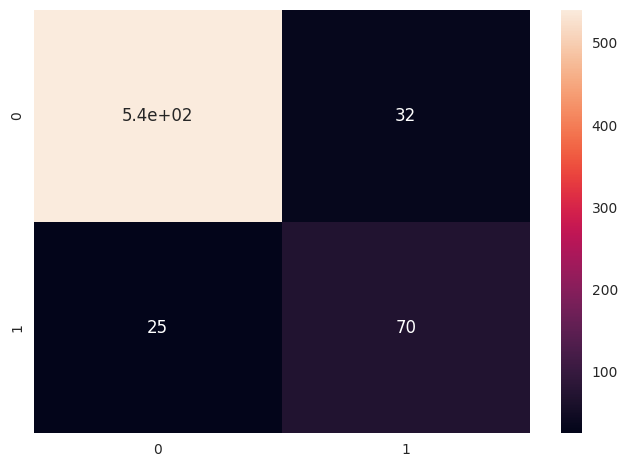

In [65]:
conf = confusion_matrix(Y_test,pred)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

# **10- Customer segmentation**

# **First approach: Confusion Matrix for Feature Selection**

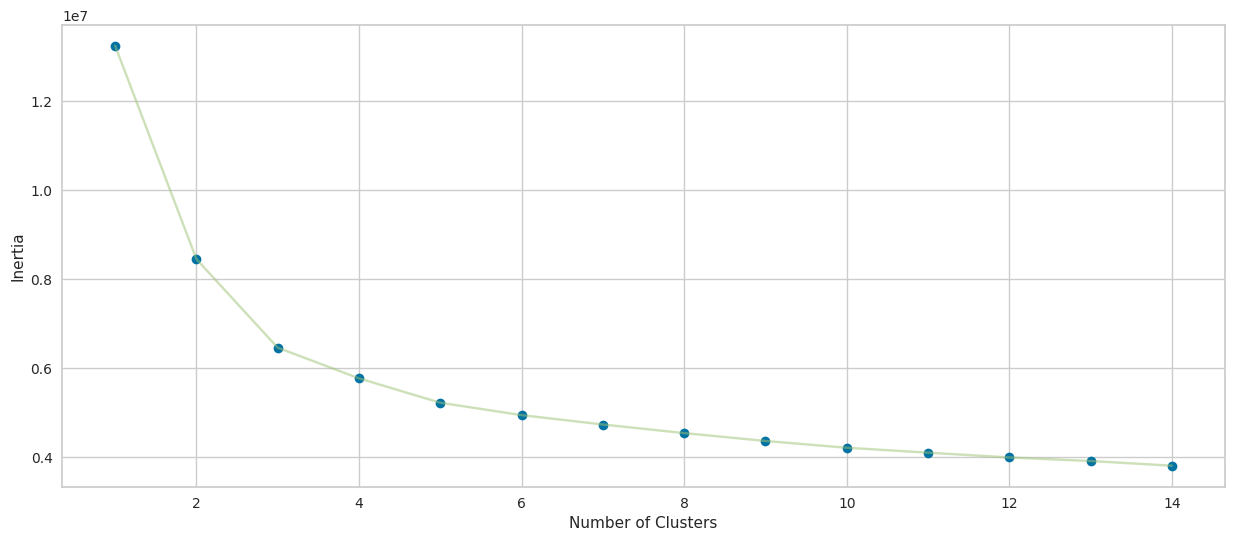

In [66]:
# train3 is fine for this.
clust_data = telco_tr_cp1.drop(['Churn','State'], axis=1)
inertia = []
for i in range(1,15):
    clust_model = KMeans(n_clusters= i , init='k-means++', n_init=10)
    clust_model.fit(clust_data)
    inertia.append(clust_model.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

**The optimal number of clusters is 4**

In [67]:
clust_model = KMeans(n_clusters= 4 , init='k-means++', n_init=10)
clusters = clust_model.fit_predict(clust_data)
print(silhouette_score(clust_data, clusters))

0.2561880748381138


In [68]:
print(len(clusters))

2666


In [69]:
telco_tr_cp['Cluster']=pd.Series(clusters, index= telco_tr_cp.index)
telco_tr_cp

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56,2
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24,2
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29,2
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,40,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,52.17,0
2662,3,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,60.10,2
2663,49,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,63.53,0
2664,39,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,67.74,3


In [70]:
number_per_cluster=telco_tr_cp['Cluster'].value_counts().sort_index()
number_per_cluster

Cluster
0    1036
1     337
2     951
3     342
Name: count, dtype: int64

In [71]:
#calculating the number of churners in each cluster
customer_seg= telco_tr_cp.groupby('Cluster').Churn.sum().sort_index()
customer_seg

Cluster
0    139
1     46
2    150
3     53
Name: Churn, dtype: int64

In [72]:
churners_percentage = (customer_seg/number_per_cluster  )*100
churners_percentage

Cluster
0    13.416988
1    13.649852
2    15.772871
3    15.497076
dtype: float64

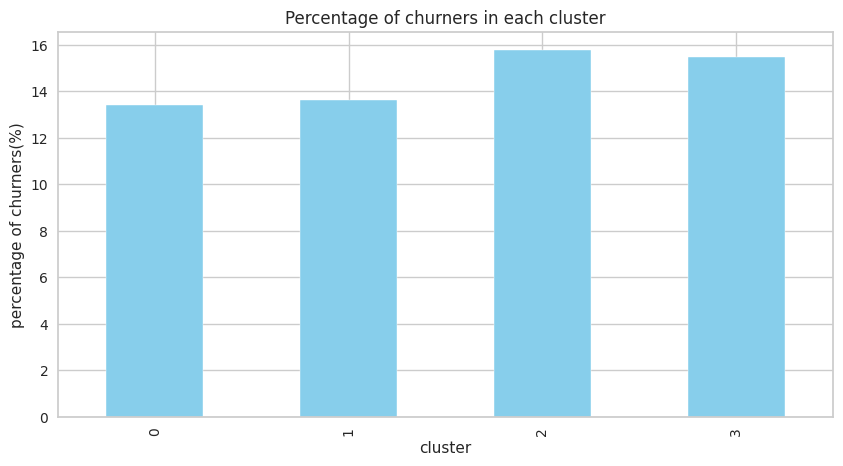

In [73]:
plt.figure(figsize=(10,5))
churners_percentage.plot(kind='bar',color='skyblue')
plt.xlabel('cluster')
plt.ylabel('percentage of churners(%)')
plt.title('Percentage of churners in each cluster')
plt.show()


**We can notice that for each cluster the percentage of churners are equal. As a result, it's important to offer the best choice for each type of clients.**

**Before that, we have to understand each cluster specification and determine their profile**

* # **Cluster analysis**

**In this part of the project, we will evaluate each cluster and determine their behavioral attitudes. So, we will perform clients profiling to make decisions based on each profile.**

In [74]:
# Setting up the color scheme for the clusters (RGB order)
colors = ['#e8000b', '#1ac938', '#023eff','#f7ff07']



In [75]:
# Create separate data frames for each cluster
"""cluster_0 = X_train[X_train['Cluster'] == 0]
cluster_1 = X_train[X_train['Cluster'] == 1]
cluster_2 = X_train[X_train['Cluster'] == 2]
cluster_3 = X_train[X_train['Cluster'] == 3]


# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['International plan'], y=cluster_0['Total charge'], z=cluster_0['Customer service calls'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['International plan'], y=cluster_1['Total charge'], z=cluster_1['Customer service calls'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['International plan'], y=cluster_2['Total charge'], z=cluster_2['Customer service calls'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))
fig.add_trace(go.Scatter3d(x=cluster_3['International plan'], y=cluster_3['Total charge'], z=cluster_3['Customer service calls'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 3'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='International plan'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Total charge'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='Customer service calls'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()"""

'cluster_0 = X_train[X_train[\'Cluster\'] == 0]\ncluster_1 = X_train[X_train[\'Cluster\'] == 1]\ncluster_2 = X_train[X_train[\'Cluster\'] == 2]\ncluster_3 = X_train[X_train[\'Cluster\'] == 3]\n\n\n# Create a 3D scatter plot\nfig = go.Figure()\n\n# Add data points for each cluster separately and specify the color\nfig.add_trace(go.Scatter3d(x=cluster_0[\'International plan\'], y=cluster_0[\'Total charge\'], z=cluster_0[\'Customer service calls\'], \n                           mode=\'markers\', marker=dict(color=colors[0], size=5, opacity=0.4), name=\'Cluster 0\'))\nfig.add_trace(go.Scatter3d(x=cluster_1[\'International plan\'], y=cluster_1[\'Total charge\'], z=cluster_1[\'Customer service calls\'], \n                           mode=\'markers\', marker=dict(color=colors[1], size=5, opacity=0.4), name=\'Cluster 1\'))\nfig.add_trace(go.Scatter3d(x=cluster_2[\'International plan\'], y=cluster_2[\'Total charge\'], z=cluster_2[\'Customer service calls\'], \n                           mode=\'m

In [76]:
customer_profiling_dataset = telco_tr_cp.drop(['Total day minutes','Total eve minutes','Total night minutes', 'Total intl minutes','State','Area code'], axis=1)
customer_profiling_dataset.head()

,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,2
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,2
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,2
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,0
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,0


In [77]:
customer_profiling_dataset.reset_index(drop=True, inplace=True)
customer_profiling_dataset.insert(0, 'Index', telco_tr_cp.index)
customer_profiling_dataset.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,2
1,1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,2
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,2
3,3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,0
4,4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,0


Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge', 'Total night calls',
       'Total night charge', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'Churn', 'Total charge'],
      dtype='object')
['Account length' 'International plan' 'Voice mail plan'
 'Number vmail messages' 'Total day calls' 'Total day charge'
 'Total eve calls' 'Total eve charge' 'Total night calls'
 'Total night charge' 'Total intl calls' 'Total intl charge'
 'Customer service calls' 'Churn' 'Total charge']
[<PolarAxes: > <PolarAxes: > <PolarAxes: > <PolarAxes: >]


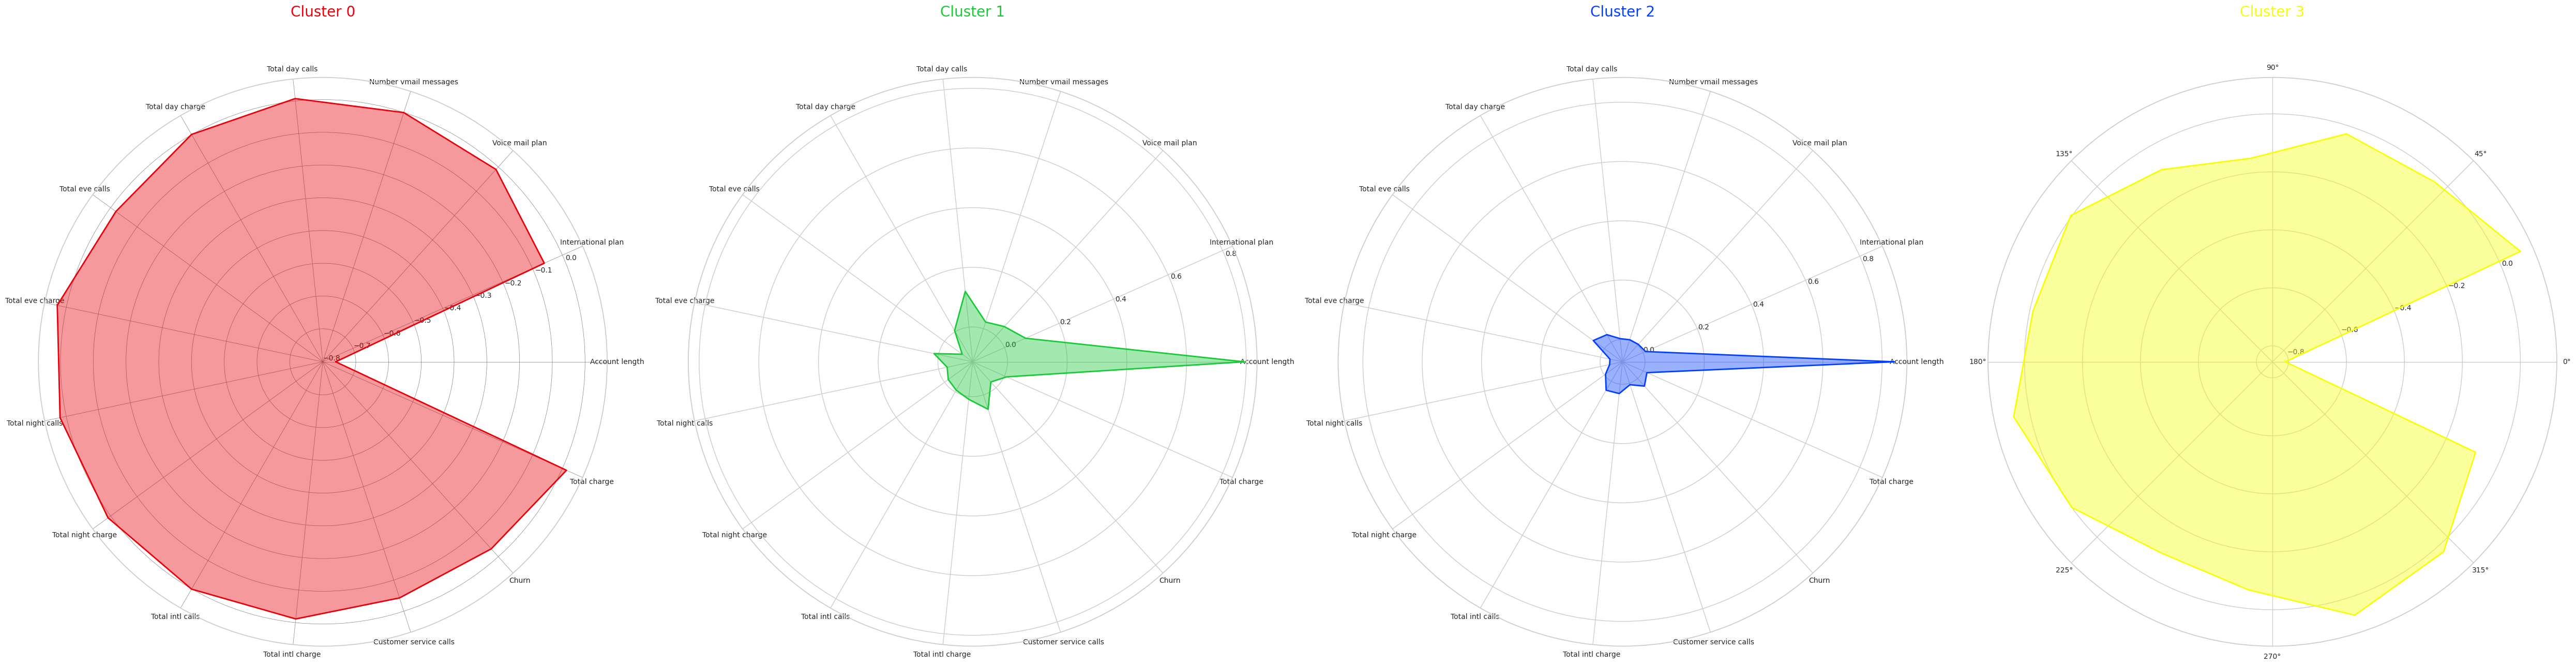

In [78]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_profiling_dataset.set_index('Index')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']
print(df_customer.columns[:-1])
# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)
print(labels)
# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(50, 30), subplot_kw=dict(polar=True), nrows=1, ncols=4)
print(ax)
# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


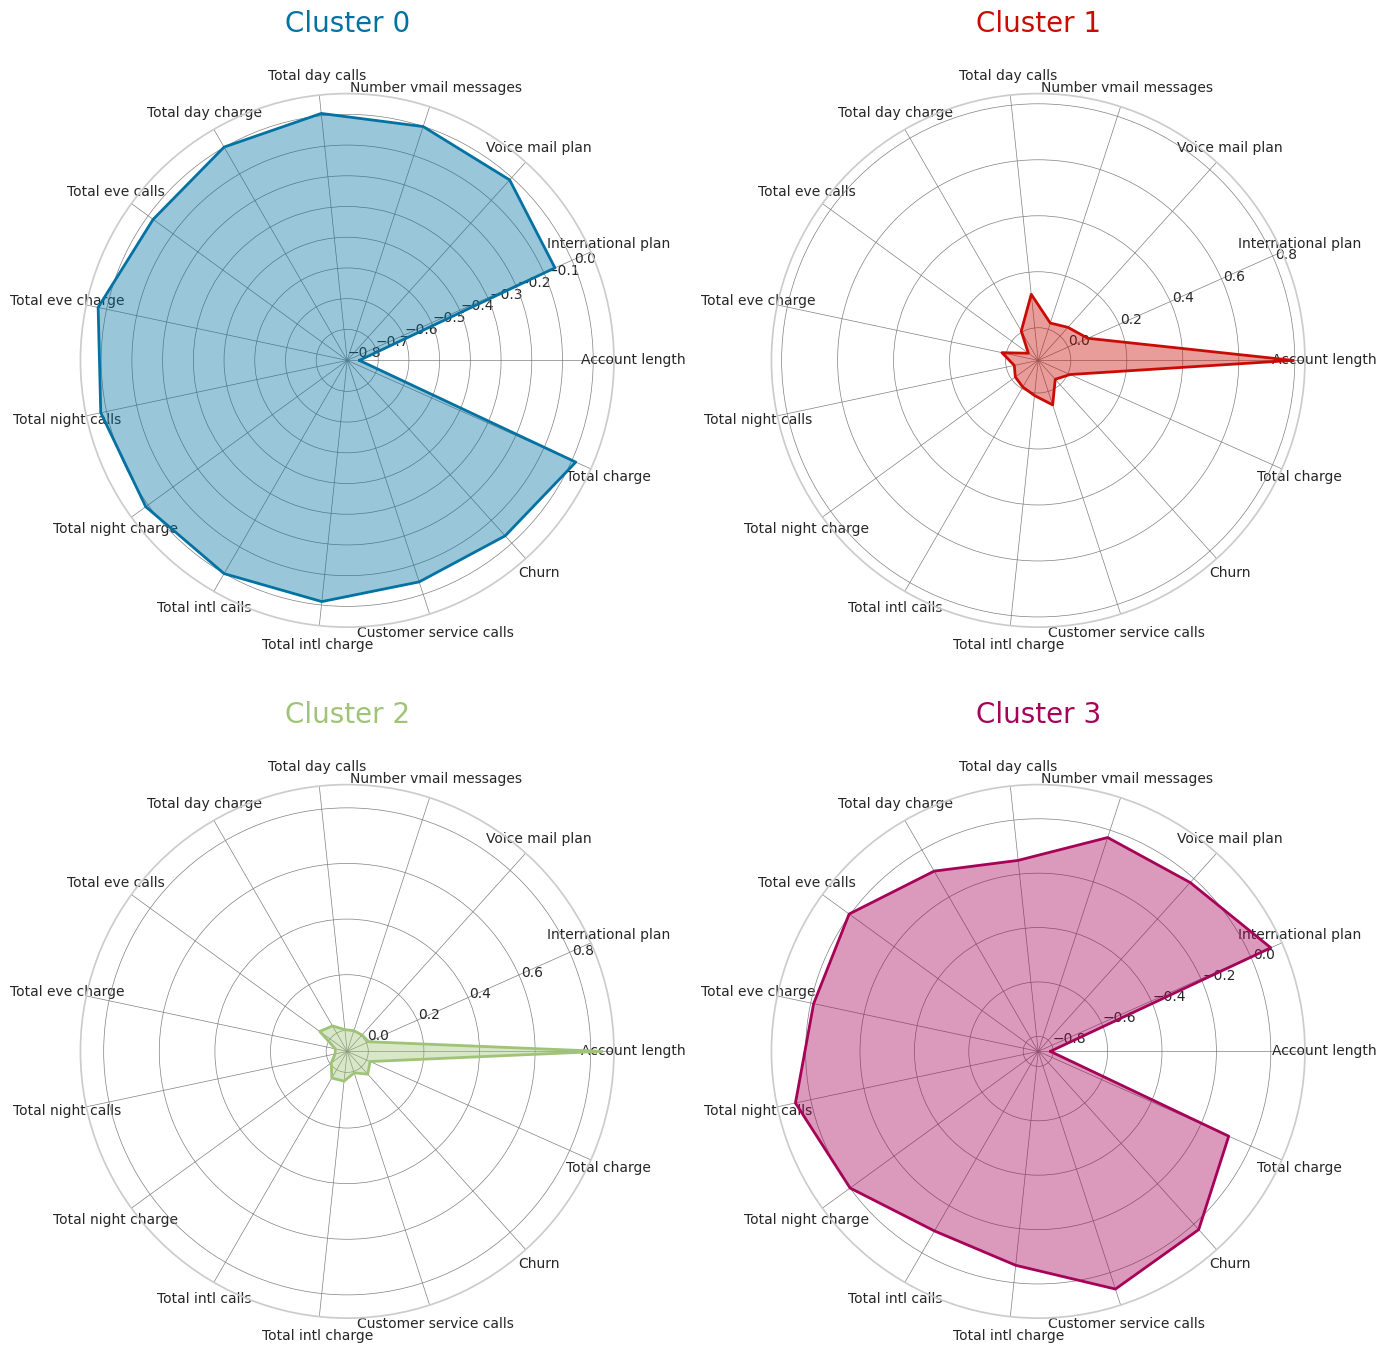

In [79]:



# Assuming you have the necessary dataset
# Setting 'Index' column as index and assigning it to a new dataframe
df_customer = customer_profiling_dataset.set_index('Index')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with 2x2 subplots
fig, axs = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True), nrows=2, ncols=2)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Colors for each cluster (You should define colors)
colors = ['b', 'r', 'g', 'm']  # Assuming there are 4 clusters

# Create radar chart for each cluster
for i, color in enumerate(colors):
    if i < len(cluster_centroids):  # Ensure that we only plot existing clusters
        data = cluster_centroids.loc[i].tolist()
        data += data[:1]  # Complete the loop
        create_radar_chart(axs[i], angles, data, color, i)
        
        # Set the labels for each cluster plot
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(labels[:-1])

# Hide any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Add a grid to all subplots
for axis in axs:
    axis.grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


In [80]:
X_test.head()

,International plan,Total charge,Customer service calls
0,0.0,0.709094,0.125
1,0.0,0.415887,0.500
2,0.0,1.000000,0.500
3,0.0,0.214231,0.250
4,0.0,0.345346,0.125


# **Second approach: PCA approach**

In this part we will apply PCA to  consider the overall variance in our dataset and capture broader patterns of customer behavior.

In [81]:
customer_profiling_dataset.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,2
1,1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,2
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,2
3,3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,0
4,4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,0


Before doing PCA, we need to rescale our data

In [82]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['Index', 'International plan', 'Voice mail plan','Churn','Cluster']

# List of columns that need to be scaled
columns_to_scale = customer_profiling_dataset.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_profiling_dataset.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,0.692163,0,1,1.247508,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,0,1.545571,2
1,1,0.161278,0,1,1.320985,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,0,-0.011704,2
2,2,0.919686,0,0,-0.589414,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,0,0.279331,2
3,3,-0.420168,1,0,-0.589414,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,0,0.709681,0
4,4,-0.647691,1,0,-0.589414,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,0,-0.693966,0


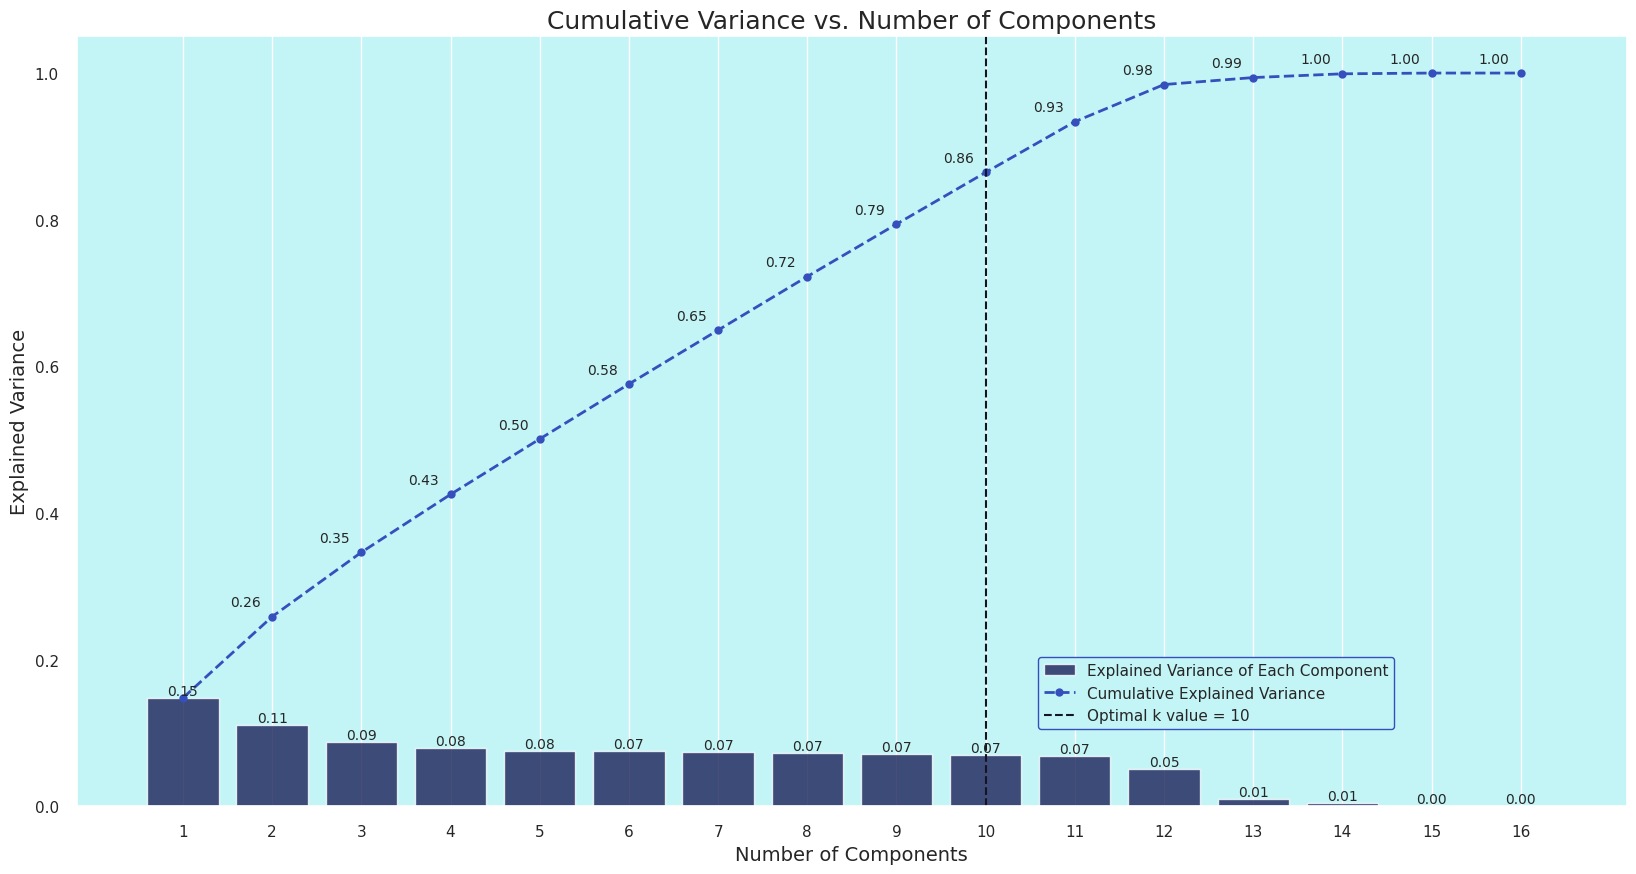

In [83]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('Index', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 10

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#c3f5f7'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#101861',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='#3550bd', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='#131424', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#3550bd')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

In [84]:
# Creating a PCA object with 6 components
pca = PCA(n_components=10)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [85]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Index,,,,,,,,,,
0,2.168304,-1.146725,1.203061,-0.266957,-1.173982,-0.284429,-0.754065,0.013967,-0.296829,0.107226
1,-0.005624,-0.656061,1.324880,-1.087342,-0.905231,-0.044000,0.046744,0.417405,-0.790302,-0.927476
2,0.336767,-1.256451,-0.470857,-1.678730,-0.024284,0.710840,-0.928434,-0.999975,0.901300,0.811152
3,1.049591,0.983148,-0.612425,0.275097,-1.152185,0.987304,-0.596266,-0.030205,1.579383,3.368523
4,-0.915474,1.269368,-0.811745,-0.129223,-1.085939,0.614567,0.931202,-1.020532,1.047853,-0.618888


In [86]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
Account length,-0.028028,-0.603834,0.022046,-0.099562,0.027820,0.003731,-0.098698,0.029029,-0.007572,-0.085918
International plan,0.012861,-0.012322,0.001936,-0.009308,0.013121,0.001214,0.002914,-0.002442,0.001613,0.000878
Voice mail plan,0.014801,0.005311,0.386097,0.014308,-0.067824,-0.052457,0.009131,0.014555,0.008714,-0.022154
Number vmail messages,0.035472,0.016893,0.890639,0.021478,-0.156527,-0.122039,0.030024,0.036480,0.024935,-0.038120
Total day calls,0.012004,0.009656,-0.055914,-0.573979,-0.288915,-0.023925,-0.264785,0.012550,0.161658,-0.650261
Total day charge,0.620433,-0.059462,-0.029717,-0.071600,-0.141064,0.030721,-0.109533,-0.126869,0.317849,0.258203
Total eve calls,0.005956,-0.063216,0.027607,-0.164830,-0.104086,0.093550,0.450746,-0.821465,-0.243051,-0.049328
Total eve charge,0.290093,0.023435,0.019956,0.250131,0.520851,-0.280882,0.125747,0.062929,-0.320034,-0.526494
Total night calls,0.027333,0.032725,0.066066,0.233886,0.136227,0.712637,0.129761,-0.030125,0.338040,-0.383761
Total night charge,0.160201,-0.002001,-0.043134,0.015000,-0.480313,0.369157,0.127255,0.364085,-0.657047,-0.022861


**Now, we will determine the optimal number of clusters:**

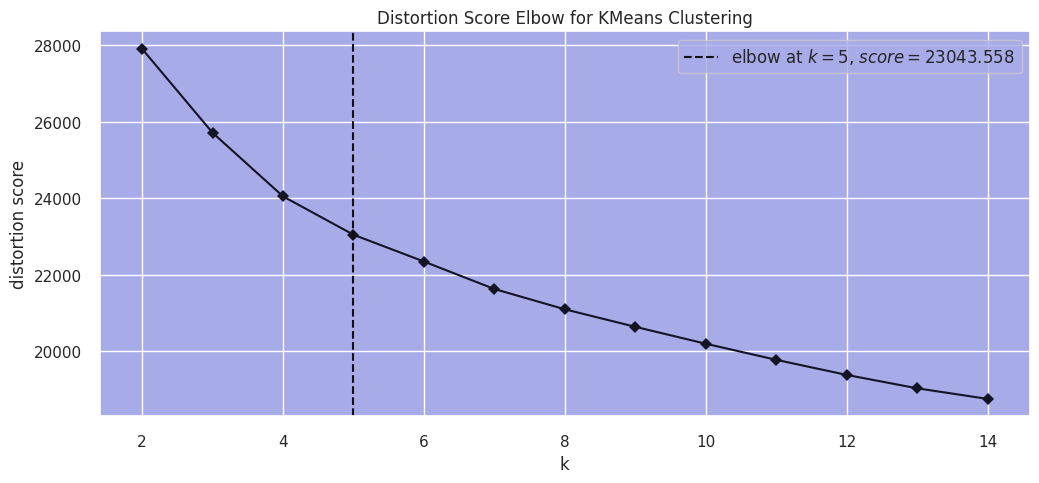

In [87]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#a7abe8'})

# Set the color palette for the plot
sns.set_palette(['#131424'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();


**We can notice that the KElbow visualizer indicate that the optimal number of clusters is 6 but the curve continue to decrease significantly and we can't see the elbow clearly. For that, the optimal number of clusters could be between 4 and 8. So, we will choose 4 clusters to be close to the first approach.**

In [88]:
from collections import Counter
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {3:2, 2: 1, 1: 0, 0: 3}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_profiling_dataset['Cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['Cluster'] = new_labels

In [89]:
# Display the first few rows of the original dataframe
customer_profiling_dataset.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,0
1,1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,0
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,1
3,3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,3
4,4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,3


* # **Cluster analysis**

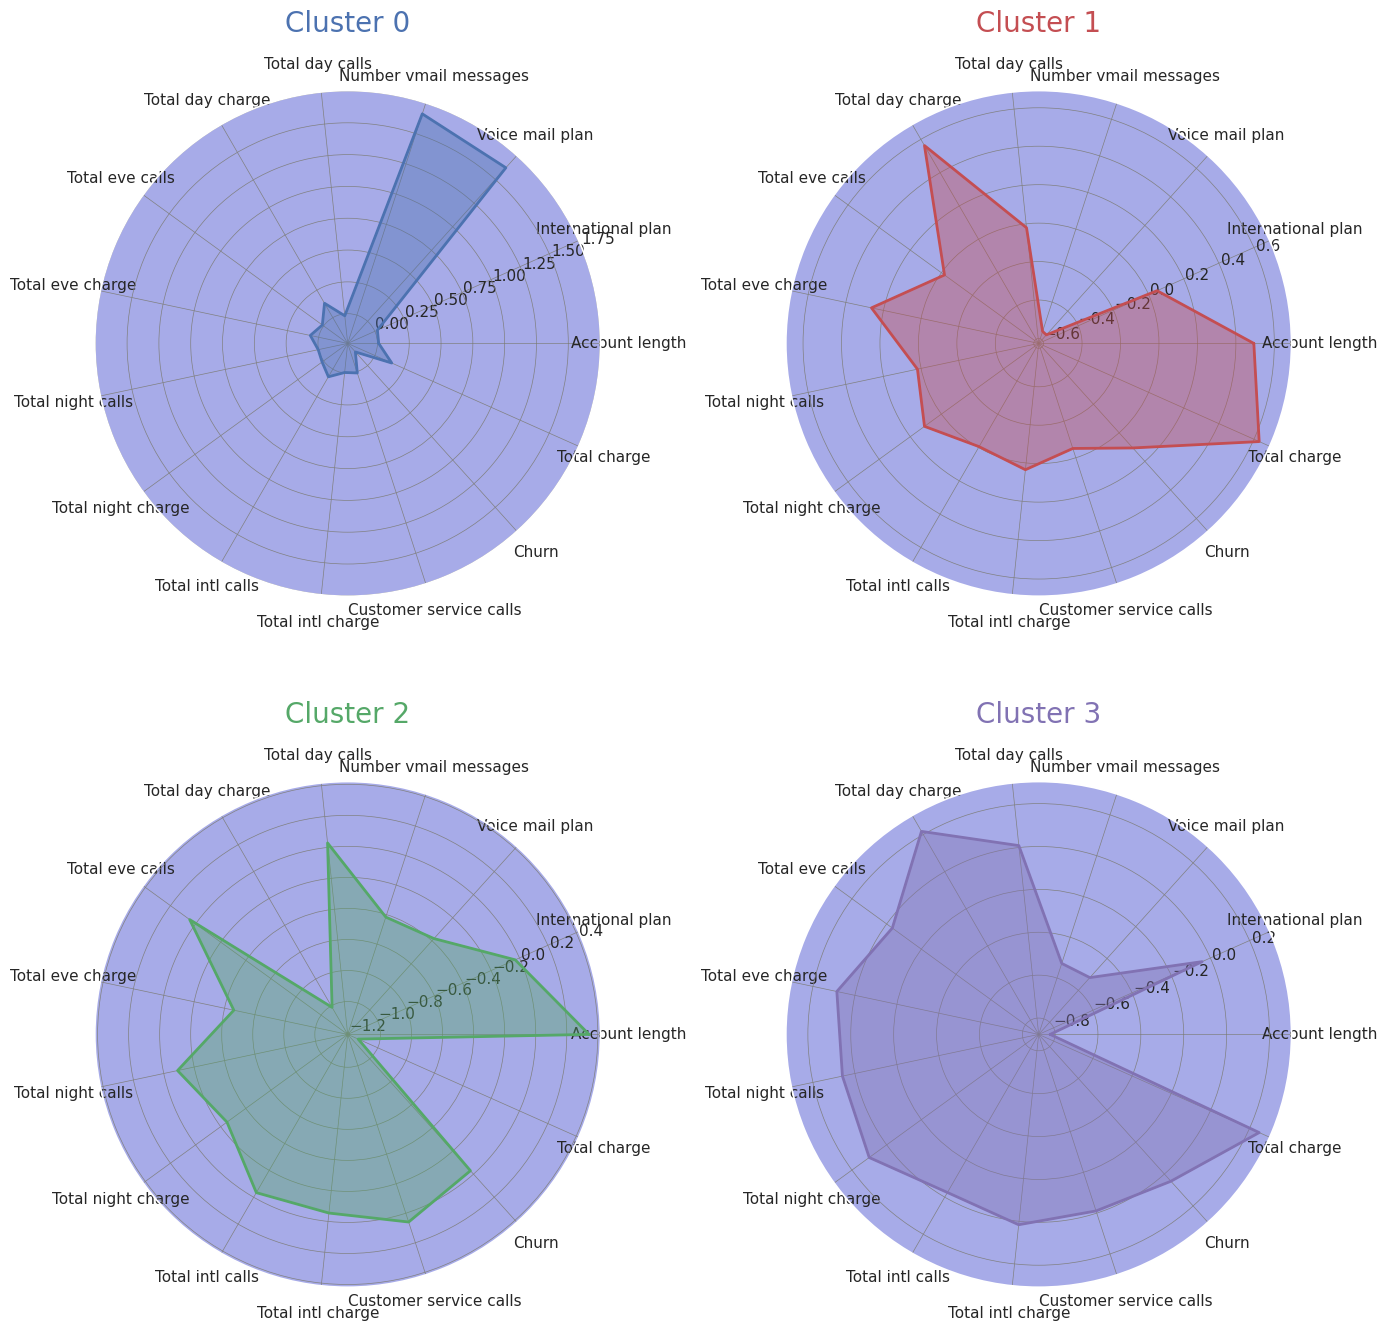

In [90]:



# Assuming you have the necessary dataset
# Setting 'Index' column as index and assigning it to a new dataframe
df_customer = customer_profiling_dataset.set_index('Index')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['Cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['Cluster'] = df_customer['Cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('Cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure with 2x2 subplots
fig, axs = plt.subplots(figsize=(14, 14), subplot_kw=dict(polar=True), nrows=2, ncols=2)

# Flatten the axs array for easier indexing
axs = axs.flatten()

# Colors for each cluster (You should define colors)
colors = ['b', 'r', 'g', 'm']  # Assuming there are 4 clusters

# Create radar chart for each cluster
for i, color in enumerate(colors):
    if i < len(cluster_centroids):  # Ensure that we only plot existing clusters
        data = cluster_centroids.loc[i].tolist()
        data += data[:1]  # Complete the loop
        create_radar_chart(axs[i], angles, data, color, i)
        
        # Set the labels for each cluster plot
        axs[i].set_xticks(angles[:-1])
        axs[i].set_xticklabels(labels[:-1])

# Hide any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Add a grid to all subplots
for axis in axs:
    axis.grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()


**=> As we can notice, the radar graph shows more distinguishable clusters that help us identify each cluster profile. Here, will try to analyze each cluster and find the characteristics of each client**

In [91]:
number_per_cluster=customer_profiling_dataset['Cluster'].value_counts().sort_index()
number_per_cluster

Cluster
0    621
1    716
2    629
3    700
Name: count, dtype: int64

In [92]:
#calculating the number of churners in each cluster
customer_seg= customer_profiling_dataset.groupby('Cluster').Churn.sum().sort_index()
customer_seg

Cluster
0     59
1    131
2     85
3    113
Name: Churn, dtype: int64

In [93]:
churners_percentage = (customer_seg/number_per_cluster  )*100
churners_percentage


Cluster
0     9.500805
1    18.296089
2    13.513514
3    16.142857
dtype: float64

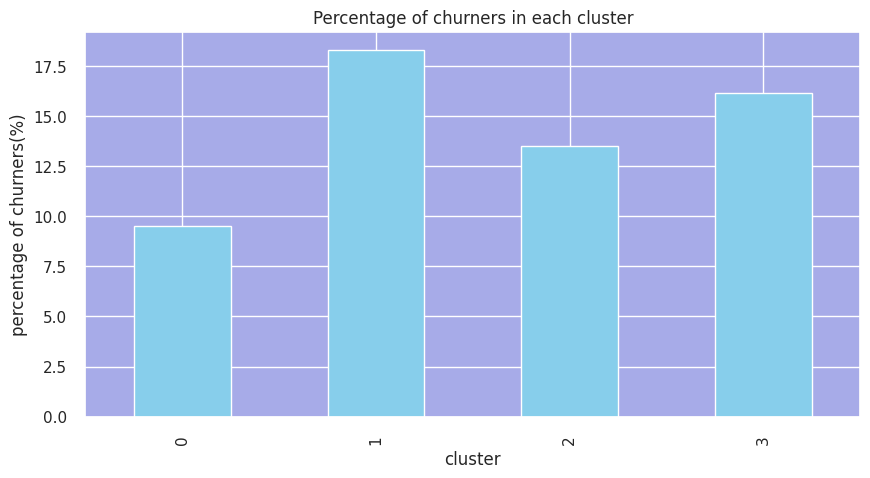

In [94]:
plt.figure(figsize=(10,5))
churners_percentage.plot(kind='bar',color='skyblue')
plt.xlabel('cluster')
plt.ylabel('percentage of churners(%)')
plt.title('Percentage of churners in each cluster')
plt.show()


# **11- Customer profiling**

**In this part we will describe each cluster. Their consumption habits and Their behavior.**

**Cluster 0:Voice mail consumers**

* Clients from this cluster are have high voice mail consumption.
* They are low consumers of all the other offers.
* Small percentage of churnenrs.

**Cluster 1:Average consumers**

* Clients have high consumption rate in the day and evening. 
* Have big amount of charges to pay.
* Considerable rate of chrnerns.
* Some of these clients have an international plan 


**Cluster 2: High-value clients**

* Clients usually have international plans.
* They usually are old consumers.
* Client from this cluster are high value consumer as they have high day, evening, and night calls rate.
* Also they do many international calls.
* But they have an important number of churners.


**Cluster 3: Bad High-value clients**

* Clients usually have international plans.
* They usually are old consumers.
* Client from this cluster are high value consumer as they have high day, evening, and night calls rate.
* Also they do many international calls.
* But they have an important number of churners.
* They have big charges to pay.

* Low consuption attitude.
* Important customer service calls.
* Needs a good recommendation as they might not have purchased the right offer. 

# **12- Build a recommendation system**

Now that we have our clusters, we will build a recommendation system so that each client have a special offer. This offers are built manually(since the dataset doesn't contain any offers), and then they will be recommended to each client depending on their profile and their risk of churn.

* **The goal of the recommendation system will be clients retention and reduce churn rates.**

In [95]:
from IPython.display import FileLink

# Save DataFrame to CSV
customer_profiling_dataset.to_csv('Clients profiling.csv', index=False)

# Provide a link to download the file
display(FileLink('Clients profiling.csv'))


/kaggle/working/Clients profiling.csv

**We shouold take in consideration the insights found in the first steps of our analysis:**

* 14.6% of the total number of clients are churners.
* Texas has the biggest percentage of churners.
* The more customer service calls are, the more we have risk of churn.
* Most of the churnerns don't have international plan, neither voice message plan.
* Account length doesn't affect the risk of churn. It has a normal distribution.
* Churners have more charges to pay than non churners.


In [96]:
customer_profiling_dataset.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,0
1,1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,0
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,1
3,3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,3
4,4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,3


In [112]:
# Identify categorical and non-categorical features
non_categorical_features = ['Number vmail messages', 'Total day charge','Total day charge','Total eve charge','Total night charge','Total intl charge','Total charge']
categorical_features = ['International plan', 'Customer service calls']

In [113]:
grouped = customer_profiling_dataset.groupby('Cluster')

In [114]:
mean_non_categorical = grouped[non_categorical_features].mean()
mean_non_categorical.head()

,Number vmail messages,Total day charge,Total day charge,Total eve charge,Total night charge,Total intl charge,Total charge
Cluster,,,,,,,
0,30.657005,31.715395,31.715395,17.322061,9.086812,2.761707,60.885974
1,0.400838,35.696606,35.696606,18.174623,9.300684,2.790866,65.962779
2,2.349762,21.200175,21.200175,15.034308,8.481335,2.723704,47.439523
3,0.832857,32.510186,32.510186,17.405086,9.282157,2.776629,61.974057


In [126]:
customer_profiling_dataset['International plan'].unique()



array([0, 1])

In [127]:
customer_profiling_dataset['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

In [129]:
# Count Occurrences of Each Unique Value for Categorical Features
count_categorical = []
for feature in categorical_features:
    count_df = grouped[feature].value_counts().unstack()
    count_categorical.append(count_df)

# Combine count DataFrames into a single DataFrame
count_categorical_combined = pd.concat(count_categorical, axis=1)

In [130]:
print(count_categorical_combined)


           0   1      0      1      2      3     4     5    6    7    8    9
Cluster                                                                     
0        554  67  117.0  233.0  147.0   73.0  33.0   9.0  7.0  2.0  NaN  NaN
1        633  83  159.0  252.0  158.0  105.0  29.0  10.0  1.0  1.0  NaN  1.0
2        571  58  124.0  211.0  154.0   84.0  32.0  16.0  4.0  3.0  1.0  NaN
3        638  62  155.0  249.0  149.0   86.0  39.0  14.0  5.0  2.0  NaN  1.0


**Now, we made statistics about each cluster so this will help us to design each offer properly.**

In [5]:
Clients_offers=pd.read_csv('/kaggle/input/clients-offers/Clients offers.csv')
Clients_offers.head()

,Index,Description,International plan offer,Voice mail plan offer(messages/day),Total day charge,Total eve charge,Total night charge,Total intl charge,Cluster,Pack description
0,1,"NC,0",No,30,0,0,0,0,0,VoiceMailersDiscount: Includes 8% more daily ...
1,2,"C,0",No,33,0,0,0,0,0,VoiceMailersPack: Includes 10% more daily VMe...
2,3,"NC,1",No,0,32,16,0,0,1,Special discount: 10% less daily charges
3,4,"C,1",No,0,30,14,0,0,1,Special offer: 12% less daily charges with fre...
4,5,"NC,2",Discount,0,21,15,8,3,2,FidelityPack: Special discount for internation...


**In the last part, we will create the reccommendation based on the following strategy:**
* Predict wheather the client will churn or not.
* Identify to which class the client belong.
* For each couple of these information, an offer is given to the client.

In [6]:
customer_profiling_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   2666 non-null   int64  
 1   Account length          2666 non-null   int64  
 2   International plan      2666 non-null   int64  
 3   Voice mail plan         2666 non-null   int64  
 4   Number vmail messages   2666 non-null   int64  
 5   Total day calls         2666 non-null   int64  
 6   Total day charge        2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night calls       2666 non-null   int64  
 10  Total night charge      2666 non-null   float64
 11  Total intl calls        2666 non-null   int64  
 12  Total intl charge       2666 non-null   float64
 13  Customer service calls  2666 non-null   int64  
 14  Churn                   2666 non-null   

In [7]:
customer_profiling_dataset.head()

,Index,Account length,International plan,Voice mail plan,Number vmail messages,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge,Cluster
0,0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,75.56,0
1,1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,59.24,0
2,2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,62.29,1
3,3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0,66.80,3
4,4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,52.09,3


In [30]:
features=['International plan','Total charge','Customer service calls','Cluster']
X= customer_profiling_dataset[features]
Y=customer_profiling_dataset['Churn']

In [31]:
Xtrain,X_test,Ytrain,Y_test = train_test_split(X,Y,train_size=0.8)

In [32]:
feature=['International plan','Total charge','Customer service calls']

Xtrain=minmax_scaling(Xtrain, columns=features)
X_test=minmax_scaling(X_test, columns=features)

In [33]:
Xtrain.head()

,International plan,Total charge,Customer service calls,Cluster
585,0.0,0.568999,0.111111,1.000000
1984,0.0,0.570645,0.444444,0.333333
1,0.0,0.493690,0.111111,0.000000
1601,0.0,0.475857,0.333333,0.333333
2120,0.0,0.454595,0.222222,0.666667


In [35]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2132 entries, 585 to 113
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   International plan      2132 non-null   float64
 1   Total charge            2132 non-null   float64
 2   Customer service calls  2132 non-null   float64
 3   Cluster                 2132 non-null   float64
dtypes: float64(4)
memory usage: 83.3 KB


In [36]:
X_train,X_Valid,Y_train,Y_Valid = train_test_split(Xtrain,Ytrain,train_size=0.8)

In [37]:
model = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7]}
grid = GridSearchCV(estimator= model, param_grid=param, cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)

{'n_neighbors': 5}


In [39]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
pred_val = model.predict(X_Valid)
pred = model.predict(X_test)

In [41]:
print("Accuracy Score is:")
print(accuracy_score(Y_test, pred))
print(accuracy_score(Y_Valid, pred_val))
print()

Accuracy Score is:
0.8408239700374532
0.9016393442622951



In [52]:
import random
# Select a random client from X_test
random_client_index = random.choice(X_test.index)
random_client = X_test.loc[random_client_index]

# Predict churn for the selected client
churn_prediction = model.predict([random_client])[0]

In [53]:
print(churn_prediction)

0


In [54]:
# Retrieve the client's cluster (assuming it's already in your DataFrame)
client_cluster = X.loc[random_client_index, 'Cluster']

In [55]:
print(client_cluster)

2


In [56]:
offer_data = {
    'Churn': [0, 1, 0, 1, 0, 1, 0, 1],
    'Cluster': [0, 0, 1, 1, 2, 2, 3, 3],
    'Offer': [
        'VoiceMailersDiscount: Includes 8% more daily VMessages.',
        'VoiceMailersPack: Includes 10% more daily VMessages.',
        'Special discount: 10% less daily charges.',
        'Special offer: 12% less daily charges with free 100 messages per month',
        'FidelityPack: Special discount for international calls with reduced minute price for local calls.',
        'FidelityPackMax: Special offer for international calls with even more reduced minute price for local calls.',
        'MaxSaver: Discounts on minute price on the weekend and more convenient internation plan.',
        'WorkerPlan: New budget-client offer with affordable minute price and more convenient internation plan.'
    ]
}
offers_df = pd.DataFrame(offer_data)

In [57]:
# Get the recommended offer based on the (churn, cluster) combination
recommended_offer = offers_df[
    (offers_df['Churn'] == churn_prediction) & (offers_df['Cluster'] == client_cluster)
]['Offer'].values[0]

# Print the recommendation
print(f"Recommended Offer for Client {random_client_index}:\n {recommended_offer}")

Recommended Offer for Client 596:
 FidelityPack: Special discount for international calls with reduced minute price for local calls.


**=>The recommendation system is now working based on the strategy that we set. It gives the appropriate offer based on the cluster and the churn risk.**

In [58]:
print("hello world")

hello world


**In conclusion, this work can be further enhanced and enriched by exploring different approaches, with the choice of approach depending on the specific goals of your analysis.**
